In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Attempt to read with 'utf-8' encoding (default)
try:
    df = pd.read_csv('zodiac_killer_dataset.csv')
except UnicodeDecodeError:
    # Fallback to a different encoding
    df = pd.read_csv('zodiac_killer_dataset.csv', encoding='latin1')


In [10]:
df

,Case ID,Victim(s),Date,Time,Location,Latitude,Longitude,Crime Type,Weapon Used,Status,Zodiac Claimed Responsibility,Details,Witnesses,Evidence Found,Victim Profile,Modus Operandi (MO),Age,Gender,Investigative Outcome
0,1,David Faraday,12/20/1968,11:15:00 PM,"Lake Herman Road, California",38.1232,-122.2447,Shooting,.22 caliber gun,Deceased,Yes,"First confirmed Zodiac attack, young couple sh...",No witness,Fled by car,"Shell casings, footprints","Ages 17 (male) and 16 (female), students",17,Male,"Targeted secluded lovers' lanes, nighttime att..."
1,2,Betty Lou Jensen,12/20/1968,11:15:00 PM,"Lake Herman Road, California",38.1232,-122.2447,Shooting,.22 caliber gun,Deceased,Yes,"First confirmed Zodiac attack, young couple sh...",No witness,Fled by car,"Shell casings, footprints","Ages 17 (male) and 16 (female), students",16,Female,"Targeted secluded lovers' lanes, nighttime att..."
2,3,Darlene Ferrin,7/4/1969,12:10:00 AM,"Blue Rock Springs Park, CA",38.1506,-122.2353,Shooting,9mm semi-automatic gun,Deceased,Yes,"Second attack, survivor described the assailan...",No witness,Drove away after shooting,"Bullet casings, survivors description","Ages 22 (female) and 19 (male), friends",22,Female,"Repeated calls to police, taunting letters fol..."
3,4,Michael Mageau,7/4/1969,12:10:00 AM,"Blue Rock Springs Park, CA",38.1506,-122.2353,Shooting,9mm semi-automatic gun,Survived,Yes,"Second attack, survivor described the assailan...",Survivor,Drove away after shooting,"Bullet casings, survivors description","Ages 22 (female) and 19 (male), friends",19,Male,"Repeated calls to police, taunting letters fol..."
4,5,Bryan Hartnell,9/27/1969,6:30:00 PM,"Lake Berryessa, Napa County, CA",38.2943,-122.2276,Stabbing,Knife,Deceased,Yes,"Attack while relaxing by the lake, Zodiac appr...",No witness,Walked away after killing,"Stab wounds, handwritten note","Ages 20 (male) and 22 (female), friends",20,Male,"Public space, random attack"
5,6,Cecelia Ann Shepard,9/27/1969,6:30:00 PM,"Lake Berryessa, Napa County, CA",38.2943,-122.2276,Stabbing,Knife,Deceased,Yes,"Attack while relaxing by the lake, Zodiac appr...",No witness,Walked away after killing,"Stab wounds, handwritten note","Ages 20 (male) and 22 (female), friends",22,Male,"Public space, random attack"
6,7,Cheri Jo Bates,10/30/1966,10:15:00 PM,"Riverside, California",33.9736,-117.3693,Stabbing,Knife,Deceased,Yes,College student found dead near a library. Zod...,No witness,NaN,No clear motive,"College student, age 18",18,Female,"Public space, random attack"
7,8,Paul Stine,10/11/1969,9:55:00 PM,"Presidio Heights, San Francisco, CA",37.7987,-122.4480,Shooting,.38 caliber gun,Deceased,Yes,"Paul Stine was a cab driver shot by Zodiac, wh...",No witness,Fled on foot,"Shell casings, fingerprints","Adult male, age 29",29,Male,"Random attack, targeted a lone individual"


In [7]:
# Convert Date and Time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time



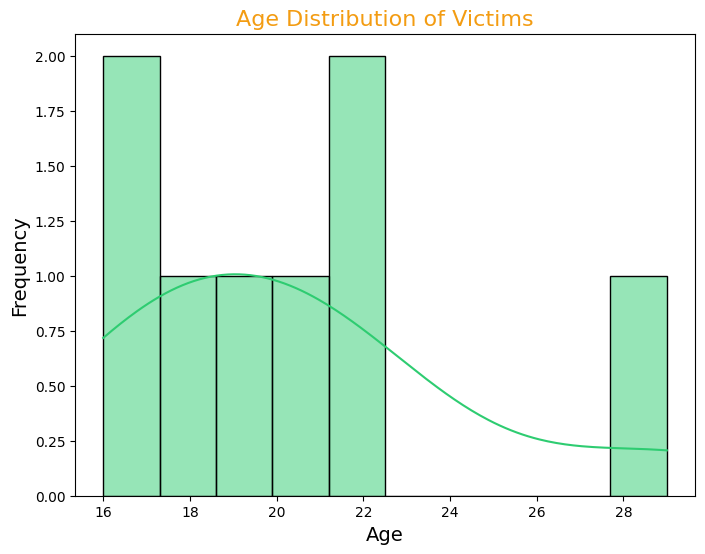

In [11]:
# 1. Age Distribution Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Age '], bins=10, kde=True, color="#2ecc71")
plt.title("Age Distribution of Victims", fontsize=16, color="#f39c12")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.savefig("age_distribution.png", dpi=300)
plt.show()

In [12]:
# Extract Latitude and Longitude
df[['Latitude', 'Longitude']] = df['Geographical Coordinates'].str.split(',', expand=True)

# Convert them to numeric values
df['Latitude'] = pd.to_numeric(df['Latitude'].str.extract('([-+]?\d*\.\d+|\d+)')[0], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'].str.extract('([-+]?\d*\.\d+|\d+)')[0], errors='coerce')

# Check the new columns
print(df[['Latitude', 'Longitude']].head())


KeyError: 'Geographical Coordinates'

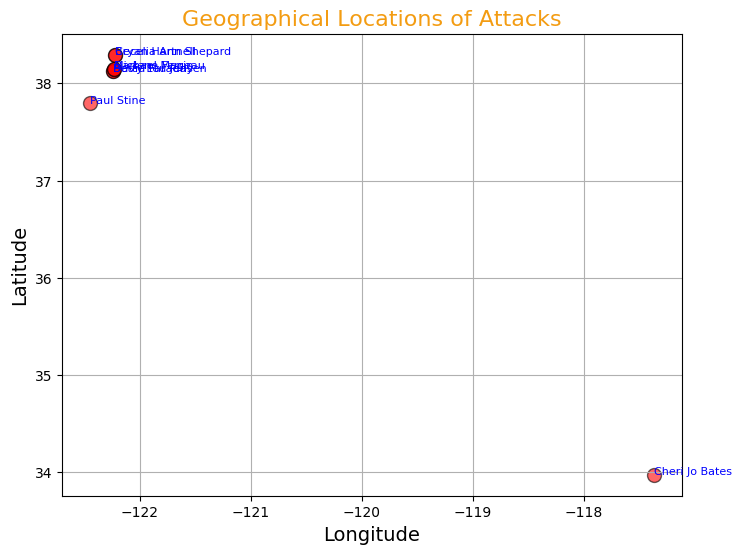

In [13]:
# Scatter plot for Geographical Locations of Attacks
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='red', alpha=0.6, edgecolor='k', s=100)

# Annotate with Victim Name
for i in range(len(df)):
    plt.text(df['Longitude'][i], df['Latitude'][i], df['Victim(s)'][i], fontsize=8, color='blue')

plt.title("Geographical Locations of Attacks", fontsize=16, color="#f39c12")
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.grid(True)

# Save the plot as PNG (if needed)
#plt.savefig("geo_scatterplot.png", dpi=300)
plt.show()


C:\Users\nitsu\AppData\Local\Temp\ipykernel_8376\1661353138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Investigative Outcome", palette="viridis")


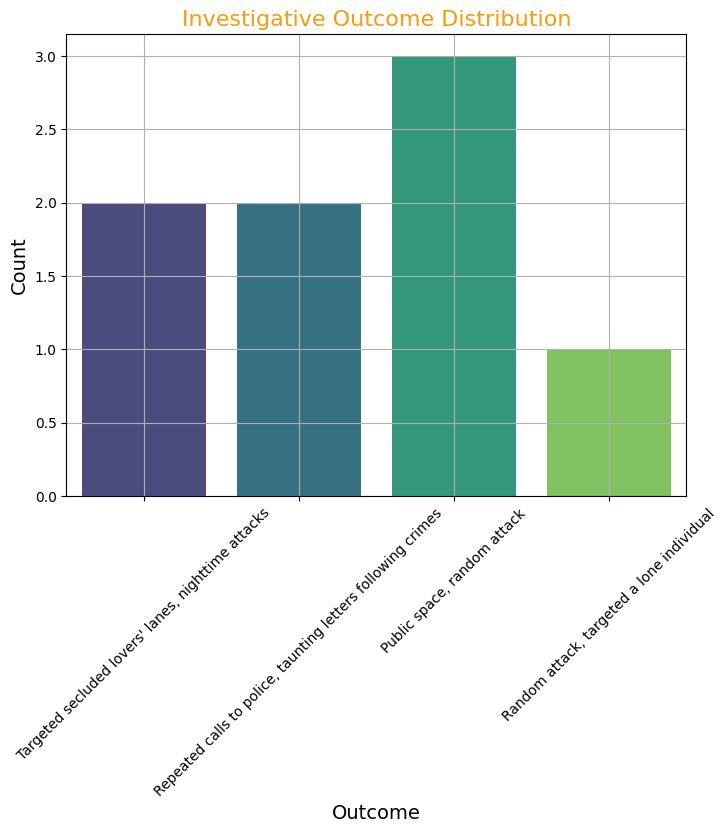

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Investigative Outcome", palette="viridis")
plt.title("Investigative Outcome Distribution", fontsize=16, color="#f39c12")
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.savefig("Investigative_Outcome.png", dpi=300)
plt.show()


In [15]:
# 4. Attack Timing Analysis
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Hour", bins=6, kde=True, color="#3498db")
plt.title("Timing of Zodiac Attacks", fontsize=16, color="#f39c12")
plt.xlabel("Hour of Attack", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.savefig("time_analysis.png", dpi=300)
plt.show()

ValueError: unconverted data remains when parsing with format "%H:%M:%S": " PM", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
#Gender vs Outcome
plt.figure(figsize=(10, 6))  # Increase figure size
sns.countplot(data=df, x="Gender", hue="Investigative Outcome", palette="Set2")
plt.title("Gender vs. Outcome", fontsize=16, color="#f39c12")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("gender_vs_outcome.png", dpi=300)
plt.show()


In [ ]:
# 6. Weapon by Location
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="Location", hue="Weapon Used", palette="coolwarm")
plt.title("Weapon Use by Location", fontsize=16, color="#f39c12")
plt.xlabel("Count", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.legend(title="Weapon", fontsize=12)
plt.savefig("weapon_by_location.png", dpi=300)
plt.show()


In [ ]:
df

In [ ]:
attack_trend = df.groupby(df['Date'].dt.year).size()
plt.figure(figsize=(10, 6))
attack_trend.plot(kind="bar", color="#e74c3c", width=0.8)
plt.title("Zodiac Attack Count Over Time", fontsize=16, color="#f39c12")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.savefig("attack_count_over_time.png", dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="Age ", palette="muted")
plt.title("Age Distribution by Gender", fontsize=16, color="#f39c12")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.savefig("gender_age_distribution.png", dpi=300)
plt.show()

In [ ]:
# 9. Correlation Matrix
correlation_data = df[["Age ", "Latitude", "Longitude"]]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16, color="#f39c12")
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()